# Fire Forest Detection - Evaluation

The goal of this notebook is to show how to train a classification model based on transfer learning.

__Pre-requisite__: The test images and the model's weights have to be downloaded (see data.ipynb notebook)

In [ ]:
import os
import numpy as np
import tensorflow as tf

import tl_utils

##  Evaluation using test images

In [2]:
test_dir = os.path.join('big', 'test')
categories = {0: 'fire', 1: 'no_fire', 2: 'start_fire'}
test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )
test_generator =  test_datagen.flow_from_directory(
    test_dir,
    batch_size=10,
    class_mode  = 'categorical',
    target_size = (224, 224))


Found 100 images belonging to 3 classes.


## Load the model

In [3]:
best_model_file = 'model-forest.hdf5'
best_model = tf.keras.models.load_model(best_model_file)

In [4]:
prediction = best_model.evaluate_generator(test_generator, verbose=1)
prediction

10/10 [==============================] - 22s 2s/step - loss: 0.1099 - acc: 0.9700


[0.1098670469596982, 0.97]

In [5]:
bad_classified = tl_utils.scan_and_classify_image(best_model, test_dir, categories)

fire         - big/test/fire/test29.jpg ([9.9929714e-01 3.3900567e-06 6.9947710e-04])
start_fire   - big/test/fire/test13.jpg ([8.6668961e-02 8.9090445e-06 9.1332215e-01])
fire         - big/test/fire/test12.jpg ([9.8778462e-01 1.3349819e-04 1.2081867e-02])
fire         - big/test/fire/test38.jpg ([9.9887711e-01 1.5616966e-06 1.1213290e-03])
fire         - big/test/fire/test11.jpg ([0.9930102  0.00140097 0.00558872])
fire         - big/test/fire/test39.jpg ([9.8158628e-01 3.5223882e-05 1.8378485e-02])
fire         - big/test/fire/test6.jpg ([0.98154885 0.01318622 0.00526497])
fire         - big/test/fire/test89.jpg ([9.8053735e-01 2.1242171e-04 1.9250263e-02])
fire         - big/test/fire/test62.jpg ([9.7135419e-01 1.3174897e-04 2.8514020e-02])
fire         - big/test/fire/test88.jpg ([9.9421847e-01 1.1709941e-04 5.6644590e-03])
start_fire   - big/test/fire/test49.jpg ([0.16455497 0.0738941  0.7615509 ])
fire         - big/test/fire/test48.jpg ([9.9859303e-01 2.0657749e-04 1.2003640e-0

start_fire   - big/test/start_fire/test23.jpg ([5.635475e-03 1.267708e-04 9.942378e-01])


## inspect the bad classified images

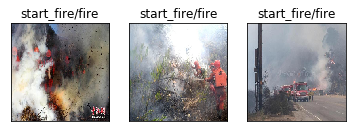

In [6]:
tl_utils.display_images_with_class(bad_classified[:6], img_columns=3)